# Report

***
> __Authors__ : Cindy Delage, Hanna Bacave, Yassine Mimouni 

***
> Inspired from :
- Wikipedia : https://en.wikipedia.org/wiki/Logistic_map
- Youtube : https://www.youtube.com/watch?v=ovJcsL7vyrk&app=desktop

## Introduction 

In order to introduce fractals pedagogically, we realised a questionnaire on the basics. So, our introduction will consist to analyse the results to introduce our subject.

In [7]:
from ipywidgets import interact
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

%matplotlib notebook

In [8]:
df_lm = pd.read_csv("data.csv")

The respondents answered at the eleven following questions :

    1/ What do you know about fractals ?
    2/ For you, a fractal is ...
    3/ The logistic map allows to study ...
    4/ Fractals have been introduced by Benoit B. Mandelbrot in ...
    5/ Mandelbrot fractal is defined by the equation ...
    6/ The link between logistic map and Mandelbrot fractal is ...
    7/ The highest dimension to represent fractals is ...
    8/ Mandelbrot set is particular because ...
    9/ In the equation of Mandelbrot set c is ...
    10/ Fractals have been used to ...
    11/ For you, do we know everything about fractals ?
    
On this questions :
    - the first consists in choosing a number on a scale from 0 to 10 indicating the knowledge level on the subject of each ;
    -  the others consist in picking between thre options 
the one that seems the most correct. 

First of all, we are going to start by editing the distribution of knowledge level of the respondents. To do this, we will plot the histogram corresponding to the results of question n°1 on which it is possible to change the range which takes the values, the transparency and the standardization of the values.

In [12]:
def hist(n_bins=10, density=True):
    fig, ax = plt.subplots(1, 1, figsize=(5, 5))
    ax.hist(df_lm['What do you know about fractals ?'],
            bins=n_bins, density=density, alpha=1)
    plt.xlabel('Knowledge level')
    plt.ylabel('Proportion')
    plt.title("Histogram of knowledge level of respondent")
    plt.tight_layout()
    plt.show()

In [13]:
interact(hist, n_bins=(1, 50, 1), density=True)

interactive(children=(IntSlider(value=10, description='n_bins', max=50, min=1), Checkbox(value=True, descripti…

<function __main__.hist(n_bins=10, density=True)>

La première question nous permet donc d'établir un premier diagnostic : peu de gens connaissent le monde des fractales. 

Maintenant, nous allons étudier plus en détail les réponses à chaque question. Nous nous proposons d'effectuer un tableau croisé de la réponse sélectionnée dans le menu déroulant et de la réponse à la question *Que savez-vous sur les fractales ?*.

In [ ]:
 4/ Fractals have been introduced by Benoit B. Mandelbrot in ...
    5/ Mandelbrot fractal is defined by the equation ...
    6/ The link between logistic map and Mandelbrot fractal is ...
    7/ The highest dimension to represent fractals is ...
    8/ Mandelbrot set is particular because ...
    9/ In the equation of Mandelbrot set c is ...
    10/ Fractals have been used to ...
    11/ For you, do we know everything about fractals ?
    

In [16]:
@interact
def crosstab(answer=['For you, a fractal is ...', 'The logistic map allows to study ...', 'Fractals have been introduced by Benoit B. Mandelbrot in ...', 'Mandelbrot fractal is defined by the equation ...','The link between logistic map and Mandelbrot fractal is ...','The highest dimension to represent fractals is ...', 'Mandelbrot set is particular because ...','In the equation of Mandelbrot set c is ...', 'Fractals have been used to ...']):
    return(pd.crosstab(df_lm[answer], df_lm['What do you know about fractals ?'], normalize='index')*100)

interactive(children=(Dropdown(description='answer', options=('For you, a fractal is ...', 'The logistic map a…

For example, in question 2, we observe that most people think that fractals represent an object whose structure is invariant by change of scale, which is the definition proposed by Benoit B. Mandelbrot in 1975 and not in 1871 as can be seen in the results of question 4.

So now that we know what a fractal is, let's focus on the logistic equation and its relationship to the Mandelbrot set. Then, in a second and third part, we represent the Mandelbrot fractal in 2D and 3D. 

## Logistic Map

## The Mandelbrot set in 2D

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import animation
from numba import jit
from numba import int64
from numba import float64
from numba import jitclass
from scipy.sparse import csr_matrix, isspmatrix
import time
%matplotlib notebook

Comment: In this part, a full study of the time for the code produced is provided (one at every plot). You can also see this study by using yourself the functions of this module. Besides, using yourself the functions will allow you to see the study of the memory footprint of the code.

The Logistic equation is linked to the Mandelbrot set, but before we highlight this link, we should have an interest in the Mandelbrot set itself. This set is defined as the assembly of points c in the complex plan for which the sequence of complex number defined by:


\begin{cases}
z_0=0\\
z_{n+1}=z_n^2+c
\end{cases}


is bounded. We can see the Mandelbrot set as a matrix of 1 and 0, 1 meaning that c is not bounded and 0 meaning that it is bounded. It is in fact a sparse matrix, as we prove it in the file test_logistic_module. With plt.imshow, we can plot this set:

In [4]:
spec = [('largeur', int64),
        ('hauteur', int64),
        ('max_iteration', int64),
        ('xmin', float64), ('xmax', float64), ('ymin', float64), ('ymax', float64),
        ('array', int64[:, :]), ]

@jitclass(spec)
class Mandelbrot_2D:

    def __init__(self, largeur, hauteur, max_iteration,  xmin, xmax, ymin, ymax):
        self.largeur = largeur
        self.hauteur = hauteur
        self.max_iteration = max_iteration
        self.xmin = xmin
        self.xmax = xmax
        self.ymin = ymin
        self.ymax = ymax

    @property
    def Mandelbrotset(self):
        self.array = np.zeros((self.hauteur, self.largeur), dtype=int64)
        for x in range(self.hauteur):
            cx = (x * (self.xmax - self.xmin) / self.hauteur + self.xmin)
            for y in range(self.largeur):
                cy = (y * (self.ymin - self.ymax) / self.largeur + self.ymax)
                xn, yn, n = 0, 0, 0
                while (xn**2 + yn**2) < 4 and n < self.max_iteration:
                    tmp_x, tmp_y = xn, yn
                    xn = tmp_x**2 - tmp_y**2 + cx
                    yn = 2 * tmp_x * tmp_y + cy
                    n = n + 1
                if n < self.max_iteration:
                    self.array[y, x] = 1
        return self.array

start = time.time()
Z = Mandelbrot_2D(hauteur=500, largeur=500, max_iteration=100,
                  xmin=-2, xmax=0.5, ymin=-1.25, ymax=1.25)

<IPython.core.display.Javascript object>


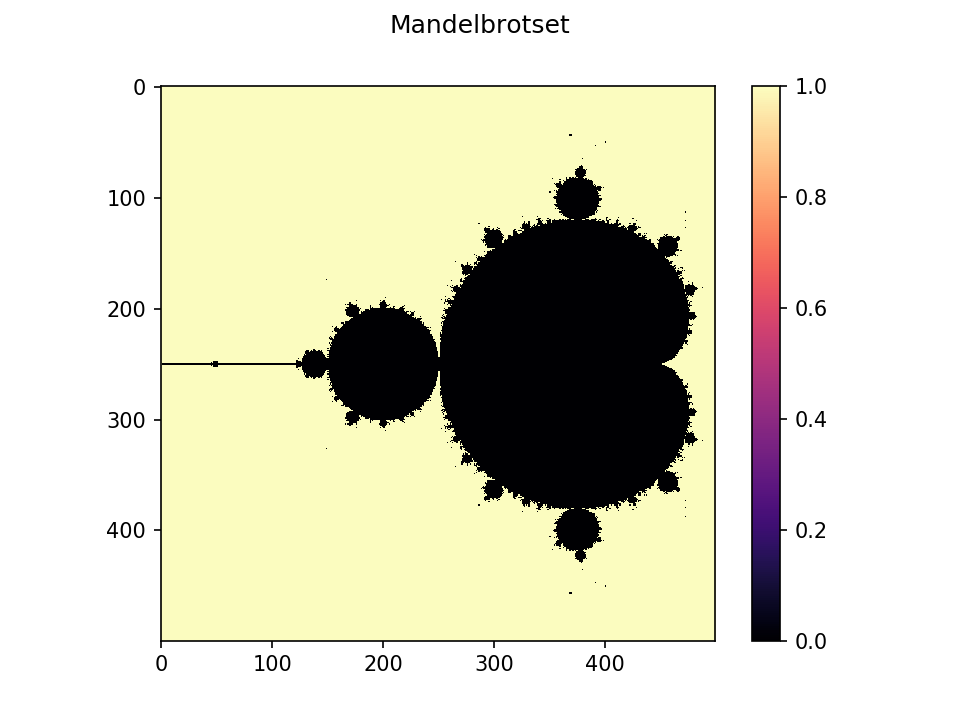

Time spent to print the Mandelbrotset:  2.69743 s.


In [5]:
%matplotlib notebook
fig = plt.figure()
fig.suptitle("Mandelbrotset")
plt.imshow(Z.Mandelbrotset, cmap="magma")
plt.colorbar()
plt.show()
end=time.time()
print("Time spent to print the Mandelbrotset:  {0:.5f} s.".format(end - start))

This picture represents the set as we see it most of the time, but changing the arguments in the function can make it a little different. We can already see it, but the set is a fractal: we can see a dozen of mini-Mandelbrot surrounding the big one, but zooming on the set makes it more obvious: let's first make a little zoom on the left of the picture:

<IPython.core.display.Javascript object>


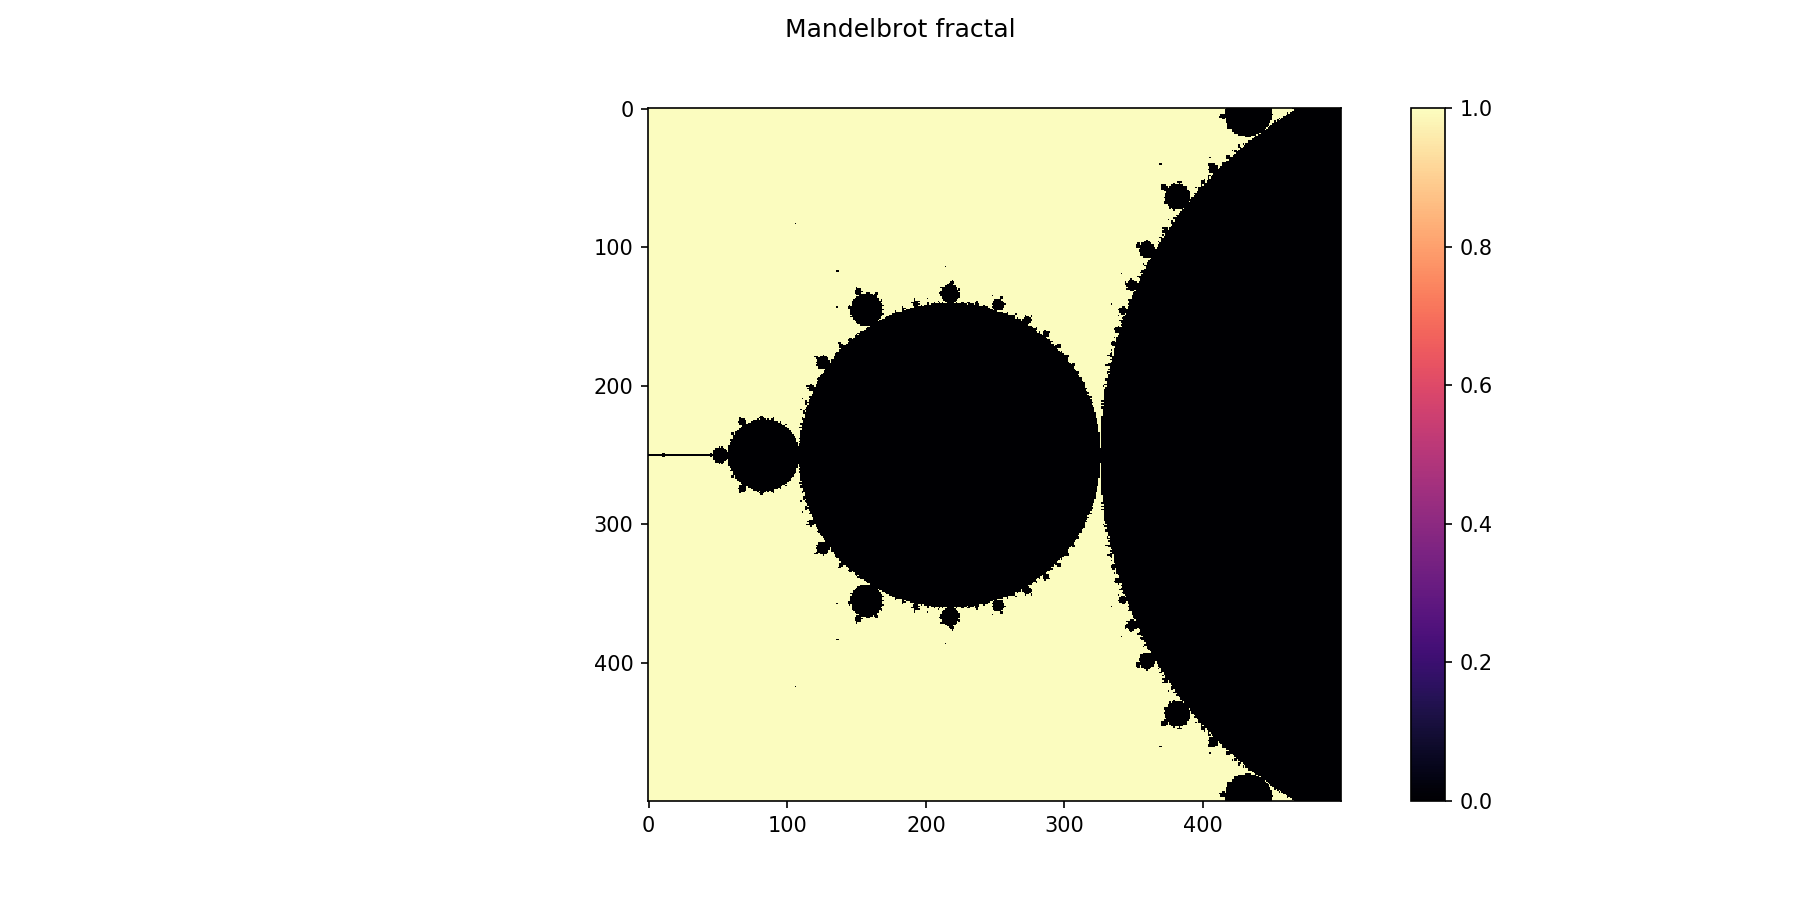

Time spent to animate the zoom on the Mandelbrotset:  0.22910 s.


In [6]:
Z_1 = Mandelbrot_2D(500, 500, 600, -2, 0.5, -1.25, 1.25)
Z_2 = Mandelbrot_2D(500, 500, 600, -1.7, 0.2, -0.95, 0.95)
Z_3 = Mandelbrot_2D(500, 500, 600, -1.5, 0, -0.75, 0.75)
Z_4 = Mandelbrot_2D(500, 500, 600, -1.5, -0.35, -0.57, 0.57)
Z_5 = Mandelbrot_2D(500, 500, 600, -1.44,-0.72, -0.4,0.4)
Z_6 = Mandelbrot_2D(500, 500, 600, -1.42, -0.98, -0.2, 0.2)
Z_7 = Mandelbrot_2D(500, 500, 600,  -1.42,-1.23,-0.1,0.09)
Z_8 = Mandelbrot_2D(500, 500, 600, -1.41886,-1.27142,-0.0961,0.08658)
Z_9 = Mandelbrot_2D(500, 500, 600, -1.41,-1.3366,-0.05,0.05)

start_1=time.time()
fig, ax = plt.subplots(1, 1, figsize=(12, 6),
                       sharey=True)
im = plt.imshow(Z_1.Mandelbrotset, cmap='magma')

def animate(i):
    if i == 0:
        im = plt.imshow(Z_2.Mandelbrotset, cmap='magma')
    if i == 1:
        im = plt.imshow(Z_3.Mandelbrotset, cmap='magma')
    if i == 2:
        im = plt.imshow(Z_4.Mandelbrotset, cmap='magma')
    if i == 3:
        im = plt.imshow(Z_5.Mandelbrotset, cmap='magma')
    if i==4:
        im = plt.imshow(Z_6.Mandelbrotset, cmap='magma')
    if i==5:
        im=plt.imshow(Z_7.Mandelbrotset, cmap='magma')
    if i==6:
        im=plt.imshow(Z_8.Mandelbrotset, cmap='magma')
    if i==7:
        im=plt.imshow(Z_9.Mandelbrotset, cmap='magma')
        
plt.colorbar()
fig.suptitle("Mandelbrot fractal")
anim = animation.FuncAnimation(fig, animate, frames=np.arange(15), interval=400, blit=False)
end_1=time.time()
plt.show()
print("Time spent to animate the zoom on the Mandelbrotset:  {0:.5f} s.".format(end_1 - start_1))

If this zoom is efficient to see the auto-similarity in the set, it is not enough to see the inside of the set, where we can obviously see many others mini-Mandelbrot but also different types of patterns, that became famous thanks to many studies on this set. We will make an over zoom on the set, to see it from the inside and to see some of these patterns. Let us begin with a simple zoom inside the set, just to see what it looks like: 

<IPython.core.display.Javascript object>


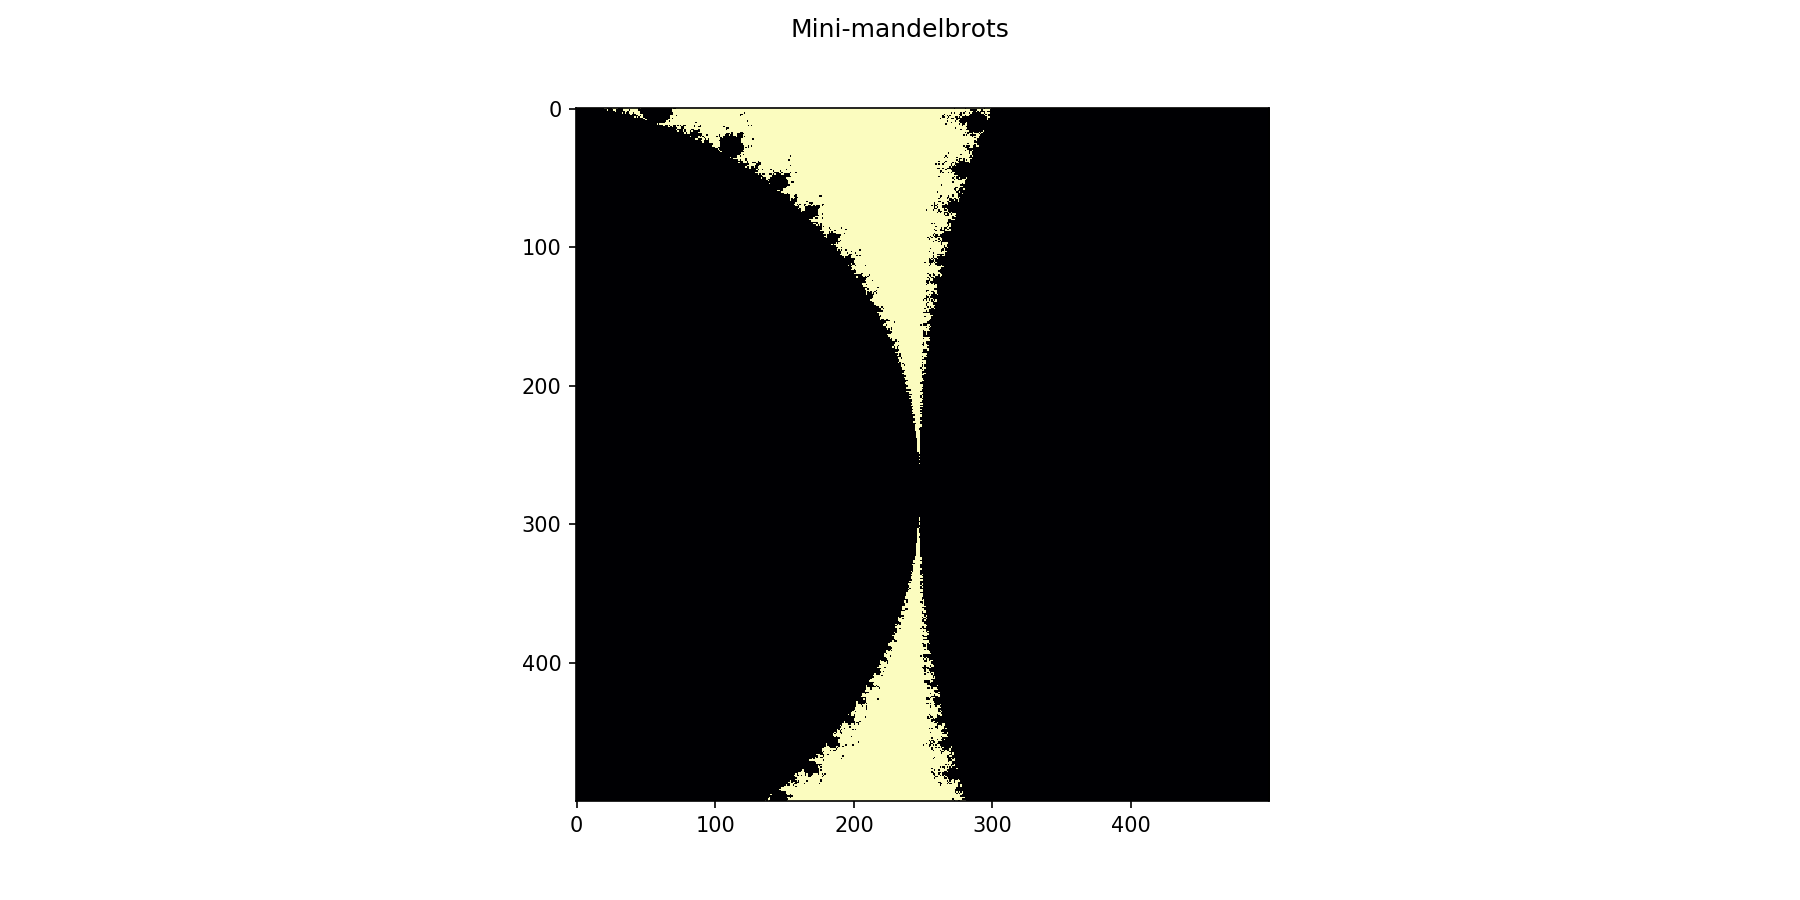

Time spent to animate the zoom inside the Mandelbrotset:  0.07109 s.


In [7]:
start_2=time.time()
fig, ax = plt.subplots(1, 1, figsize=(12, 6),
                       sharey=True)
fig.suptitle("Mini-mandelbrots")
Z=Mandelbrot_2D(500, 500, 50, -2, 0.5, -1.25, 1.25)
im = plt.imshow(Z.Mandelbrotset, cmap='magma')
def animate_200(i):
        if i<=50:
            Z=Mandelbrot_2D(500,500,50,-2+0.02*i,0.5-0.02*i, -1.25+0.02*i, 1.25-0.02*i)
            im.set_data(Z.Mandelbrotset)
        if i>50 and i<=130:
            Z_1=Mandelbrot_2D(500,500,200,-1+0.0026*(i-50),-0.5-0.0021*(i-50), -0.25+0.0044*(i-50), 0.25-0.0003*(i-50))
            im.set_data(Z_1.Mandelbrotset)
        if i>130:
            Z_2=Mandelbrot_2D(500,500,600,-0.74+0.00044*(i-150),-0.71-0.00008*(i-150), 0.19+0.00046*(i-150), 0.22-0.00006*(i-150))
            im.set_data(Z_2.Mandelbrotset)
anim = animation.FuncAnimation(fig, animate_200, frames=np.arange(0,210,1), interval=1, blit=True)
plt.show()
end_2=time.time()
print("Time spent to animate the zoom inside the Mandelbrotset:  {0:.5f} s.".format(end_2 - start_2))

This zoom makes it clearer that we are facing a fractal. It also shows a spiral form, that is one of the famous patterns we already talked about: in fact, we can see different spiral patterns in the set, with different numbers of spirals. The one we are going to see now is named "Triple spiral valley": to find the right setting of the arguments, we need to zoom little by little. A useful way to make it is to print several sparse matrix, each being a zoom of the precedent one.

<IPython.core.display.Javascript object>


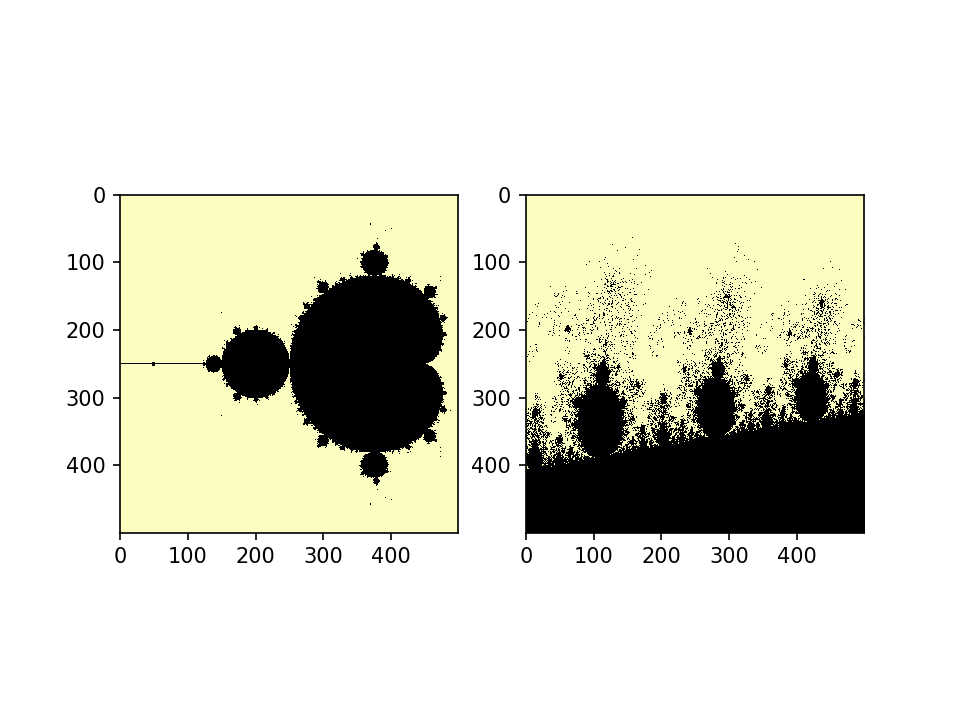

<IPython.core.display.Javascript object>


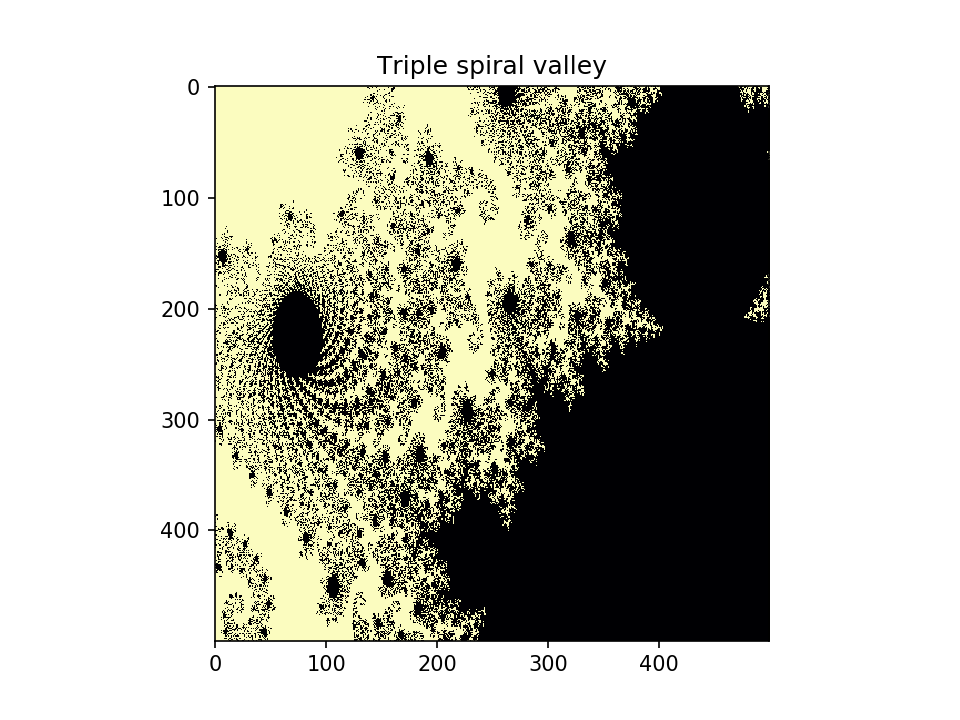

Time spent to plot a characteristic pattern:  1.22703 s.


In [8]:
start_3=time.time()
fig, ax = plt.subplots(1,2)
#We start using the Mandelbrotset without any zoom:
Z = Mandelbrot_2D(500, 500, 100,-2, 0.5, -1.25, 1.25)
ax[0].imshow(Z.Mandelbrotset, cmap='magma')
#It allows us to find new values for xmin, ymin, xmax and ymax so that we obtain a first zoom:
Z=Mandelbrot_2D(500,500,600,-0.057,-0.075,0.6435,0.6544)
ax[1].imshow(Z.Mandelbrotset, cmap='magma')
#This matrix is a sparse one
isspmatrix(csr_matrix(Z.Mandelbrotset))
#It is useful to zoom again, with more precise values of xmin, ymin, xmax and ymax:
fig = plt.figure()
Z=Mandelbrot_2D(500,500,600,-0.069,-0.0669,0.6478,0.6490)
plt.imshow(Z.Mandelbrotset, cmap='magma')
plt.title("Triple spiral valley")
end_3=time.time()
print("Time spent to plot a characteristic pattern:  {0:.5f} s.".format(end_3 - start_3))

An over famous pattern is named "Elephant valley", because of its shape like an elephant trunk :

<IPython.core.display.Javascript object>


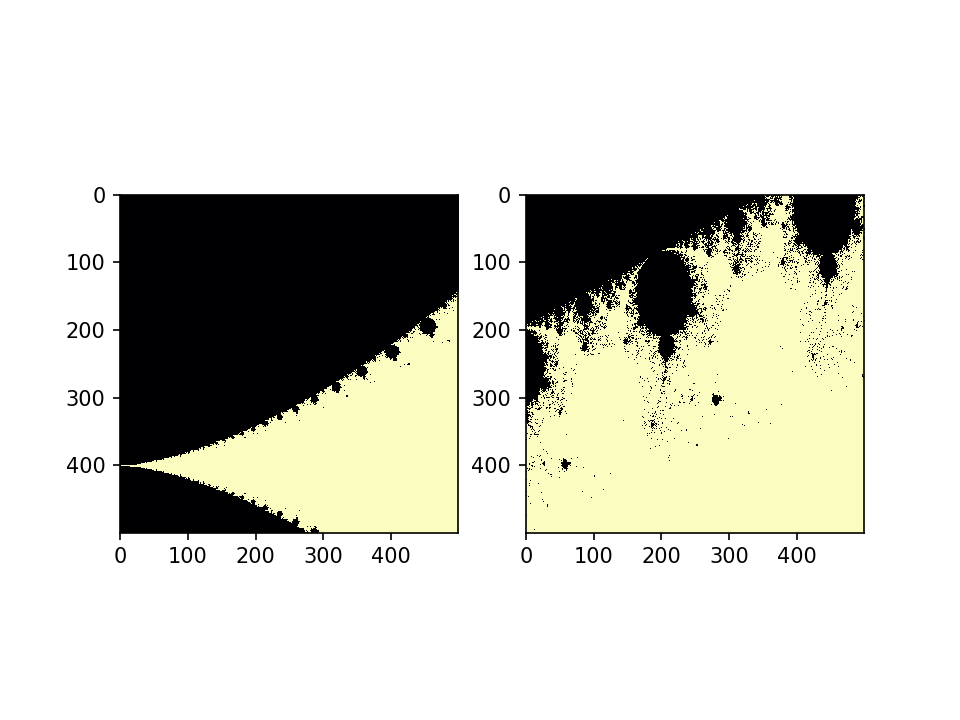

<IPython.core.display.Javascript object>


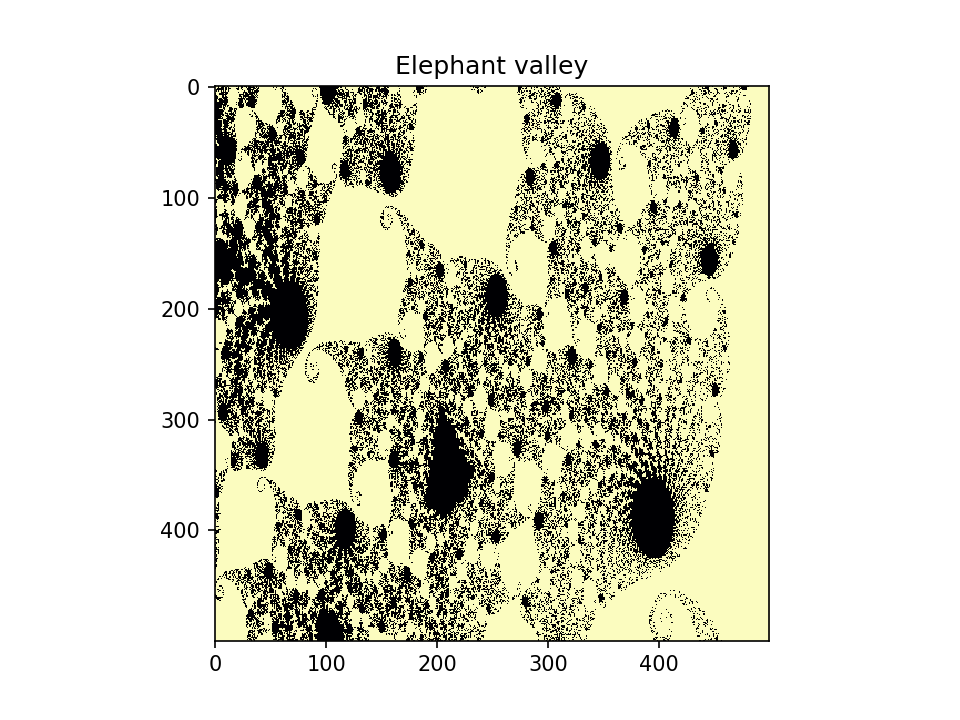

Time spent to plot a characteristic pattern:  1.50878 s.


In [9]:
start_3=time.time()
fig, ax = plt.subplots(1,2)
Z=Mandelbrot_2D(500,500,600,0.25,0.30,-0.01,0.04) #An over sparse matrix
isspmatrix(csr_matrix(Z.Mandelbrotset))
ax[0].imshow(Z.Mandelbrotset, cmap='magma')
Z=Mandelbrot_2D(500,500,600,0.2615,0.2634,0.0018,0.003) #Sparse matrix again
ax[1].imshow(Z.Mandelbrotset, cmap='magma')
#Second plot of a characteristic pattern:
fig = plt.figure()
Z=Mandelbrot_2D(500,500,600,0.26185,0.26196,0.002515,0.002573)
plt.imshow(Z.Mandelbrotset, cmap='magma')
plt.title("Elephant valley")
end_3=time.time()
print("Time spent to plot a characteristic pattern:  {0:.5f} s.".format(end_3 - start_3))

On the last picture, all of the one spiral shapes are in fact elephants valleys, you can see one at the coordinates (100,250) for example, or at the bottom left corner of the picture. We could have presented much more famous patterns, as the Seahorse valley, the scepter valley or even the Julia set, but it was not the main purpose of this project. The 3D plot of the set will allow us to highlight the link between the logistic equation and the Mandelbrot set.